# What are the highest-paying skills overall and among the most demanded skills?

## Methodology
1. Load and clean-up data.
2. Filter data
3. Group data
4. Plot data

# 1. Load and clean-up data.

In [1]:
# Importing libraries
import ast
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) # Skills from str to list

# 2. Filter data


In [2]:
# Filter for job of my interest
job_list=['Data Analyst', 'Business Analyst', 'Data Scientist']
df_DA = df[df['job_title_short'].isin(job_list)].copy()

In [3]:
# Analyse only jobs with year salary
df_DA = df_DA.dropna(subset=['salary_year_avg'])

# 3. Group data

In [6]:
#explode 'job_skills' column for skills analyze
df_exploded = df_DA.explode('job_skills')

In [51]:
# group for most paying skills and most demanded skills
df_grouped = df_exploded.groupby('job_skills').agg(
    skill_demand = ('job_skills', 'size'),
    skill_salary = ('salary_year_avg', 'median')
)
# top paying but demand >10
df_top_paying = df_grouped.sort_values(by='skill_salary', ascending=False)
df_top_paying = df_top_paying[df_top_paying['skill_demand']>=10].head(10)

df_most_demanded = df_grouped.sort_values(by='skill_demand', ascending=False).head(10).sort_values(by='skill_salary', ascending=False)

# 4. Plot data

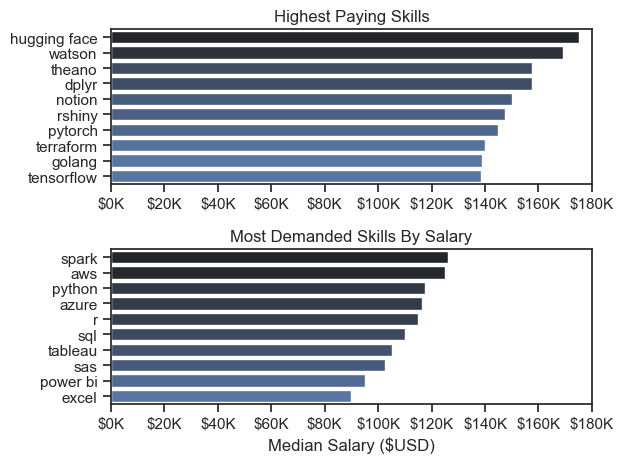

In [60]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style='ticks')

# Plot highest paying skills
sns.barplot(data=df_top_paying, x='skill_salary', y='job_skills', ax=ax[0], hue='skill_salary', palette='dark:b_r', legend=False)
ax[0].set_title("Highest Paying Skills")
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].set_xlim(0,180000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

# Plot most demanded skills
sns.barplot(data=df_most_demanded, x='skill_salary', y='job_skills', ax=ax[1], hue='skill_salary', palette='dark:b_r', legend=False)
ax[1].set_title("Most Demanded Skills By Salary")
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.tight_layout()
plt.show()

In [61]:
df_top_paying.index

Index(['hugging face', 'watson', 'theano', 'dplyr', 'notion', 'rshiny',
       'pytorch', 'terraform', 'golang', 'tensorflow'],
      dtype='object', name='job_skills')